<a href="https://colab.research.google.com/github/ucheabaco/Data-Engineering-Class/blob/main/DNNpaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
# Step 1 Import all the required libraries
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.metrics import accuracy_score, confusion_matrix

In [106]:
# Step 2 Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
# Step 3 Load the data
data = pd.read_excel('/content/drive/MyDrive/New train/all data.xlsx')


In [108]:
def split_data(data, train_ratio=0.7, test_ratio=0.2, val_ratio=0.1):
    total_data_points = len(data)

    # Calculate the number of data points for each split
    train_size = int(train_ratio * total_data_points)
    test_size = int(test_ratio * total_data_points)
    val_size = int(val_ratio * total_data_points)

    # Shuffle the data randomly
    np.random.shuffle(data)

    # Split the data into training, testing, and validation sets
    train = data[:train_size]
    test = data[train_size:(train_size + test_size)]
    val = data[(train_size + test_size):]

    return train, test, val

In [109]:
data = np.arange(861755)
train, test, val = split_data(data)

# Check if the split ratios match the intended ratios
total_data_points = len(data)
train_ratio = len(train) / total_data_points
test_ratio = len(test) / total_data_points
val_ratio = len(val) / total_data_points

print(f"Train Ratio: {train_ratio:.2f}, Test Ratio: {test_ratio:.2f}, Val Ratio: {val_ratio:.2f}")

# You can also print the lengths of the splits
print(f"Train Length: {len(train)}, Test Length: {len(test)}, Val Length: {len(val)}")

Train Ratio: 0.70, Test Ratio: 0.20, Val Ratio: 0.10
Train Length: 603228, Test Length: 172351, Val Length: 86176


In [110]:
# Step 3 Load the data
train = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/train.xlsx')
test = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/test.xlsx')

In [111]:
PC = ['0', '1', '2', '3', '4', '5']

In [112]:
# Step 4 Prepare the data
train_y = train.pop('PC')
test_y = test.pop('PC')

In [113]:
# Step 5 Normalize the data
mean = train.mean(axis=0)
std = train.std(axis=0)
train = (train - mean) / std
test = (test - mean) / std

In [114]:

# Step 6 Split data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(train, train_y, test_size=0.2, random_state=42)

In [115]:
# Step 7 Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [116]:
# Step 8 Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [117]:
# Step 9 Train the model
history = model.fit(train_data, train_labels,
                    epochs=100,
                    batch_size=256,
                    validation_data=(val_data, val_labels),
                    verbose=1)

Epoch 1/100
1616/1616 [==============================] - 5s 3ms/step - loss: 0.3001 - accuracy: 0.9257 - val_loss: 0.0166 - val_accuracy: 0.9945
Epoch 2/100
1616/1616 [==============================] - 6s 4ms/step - loss: 0.0683 - accuracy: 0.9768 - val_loss: 0.0144 - val_accuracy: 0.9945
Epoch 3/100
1616/1616 [==============================] - 4s 3ms/step - loss: 0.0598 - accuracy: 0.9784 - val_loss: 0.0127 - val_accuracy: 0.9945
Epoch 4/100
1616/1616 [==============================] - 4s 3ms/step - loss: 0.0563 - accuracy: 0.9786 - val_loss: 0.0113 - val_accuracy: 0.9945
Epoch 5/100
1616/1616 [==============================] - 6s 4ms/step - loss: 0.0539 - accuracy: 0.9792 - val_loss: 0.0100 - val_accuracy: 0.9945
Epoch 6/100
1616/1616 [==============================] - 5s 3ms/step - loss: 0.0474 - accuracy: 0.9846 - val_loss: 0.0095 - val_accuracy: 0.9945
Epoch 7/100
1616/1616 [==============================] - 4s 3ms/step - loss: 0.0433 - accuracy: 0.9875 - val_loss: 0.0080 - val_ac

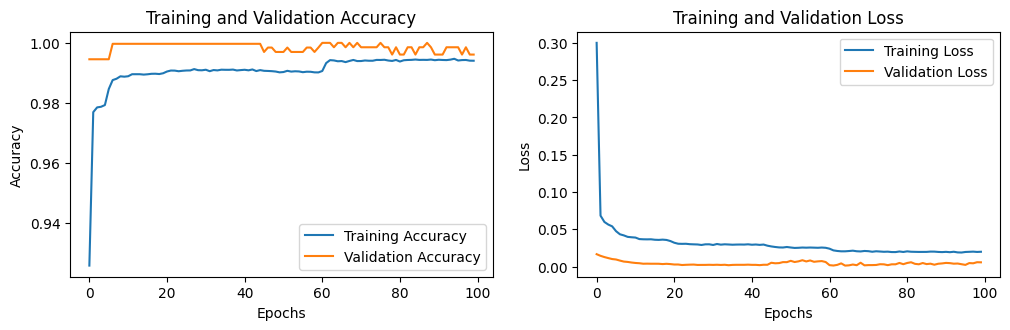

In [118]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(2,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [119]:
# Step 11 Make predictions
features = ['PA', 'CA', 'PTTCH', 'DCR', 'CSSR', 'HOSR']
predict = {}

print("Please enter numeric values for the following features:")
for feature in features:
    val = input(feature + ": ")
    if not val.isdigit():
        print('You entered a wrong value')
        exit()
    predict[feature] = [float(val)]

Please enter numeric values for the following features:
PA: 1
CA: 1
PTTCH: 1
DCR: 1
CSSR: 1
HOSR: 1


In [120]:
# Step 12 Normalize the input data
predict_data = (pd.DataFrame(predict, index=[0]) - mean) / std

In [121]:
# Step Make the prediction
class_probs = model.predict(predict_data)
class_id = np.argmax(class_probs)
class_name = PC[class_id]
probability = class_probs[0, class_id]
print('Prediction is "{}" ({:.1f}%)'.format(class_name, 100 * probability))


1/1 [==============================] - 0s 72ms/step
Prediction is "4" (100.0%)


In [122]:
# Actual (X) Vs Predicted values (y)
X = np.array([[0], [1], [2], [3], [4], [5],[0], [1], [2], [3], [4],[5], [0], [1], [2], [3], [4], [5], [0], [1], [2], [3], [4],[5], [0], [1], [2], [3], [4], [5], [0], [1], [2], [3], [4], [5]])
y = np.array([[0], [1], [2], [3], [4], [5],[0], [1], [2], [3], [4],[4], [5], [1], [2], [3], [4], [5], [0], [1], [2], [0], [4],[5], [0], [1], [2], [3], [4], [1], [0], [0],  [2], [3], [4], [5]])


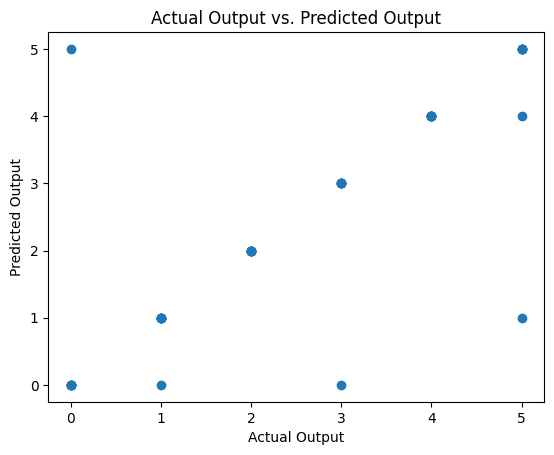

In [123]:
plt.scatter(X, y)
plt.title('Actual Output vs. Predicted Output')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

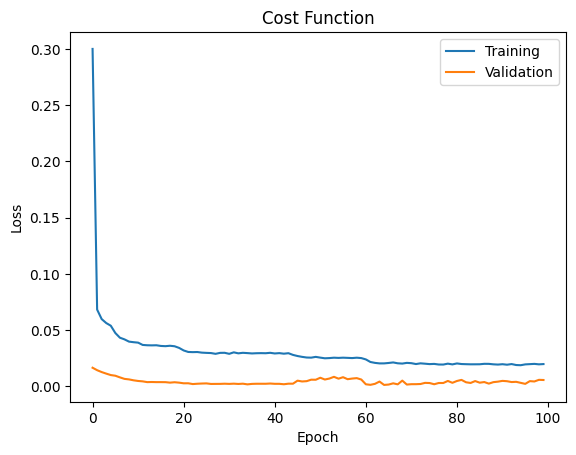

In [124]:
# Plot the cost function over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cost Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()


In [126]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

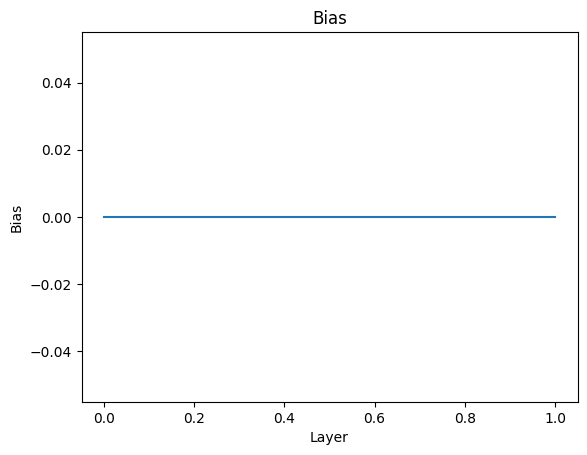

In [128]:
# Plot the bias over time
for layer in model.layers:
    if layer.trainable:
        weights = layer.get_weights()
        if len(weights) > 1:
            biases = weights[1]
            plt.plot(biases)
plt.title('Bias')
plt.xlabel('Layer')
plt.ylabel('Bias')
plt.show()